DATA PREPROCESSING
>>IMPORTING THE DATA SET

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
from os import system
data = pd.read_csv("p1.csv")

In [9]:
data.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [10]:
data.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [14]:
#describing the statistics of the data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [21]:
# data types of each attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [15]:
# checking the status of patients affecting with the pd
data.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [22]:
# Checking null value sum
data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

we have no null values in data

UNI-VARIATE ANALYSIS

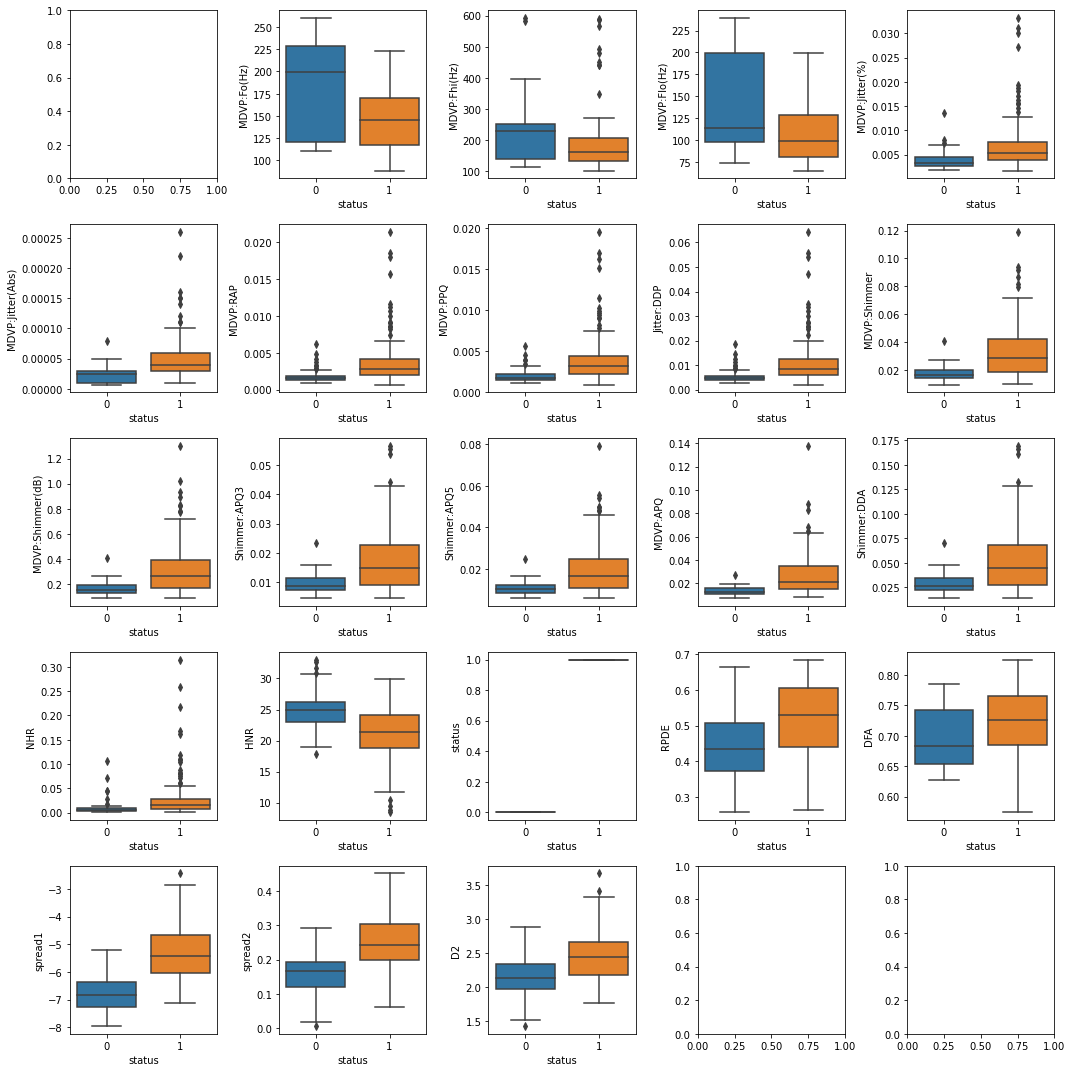

In [18]:
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(data.columns)-1):
    sns.boxplot(x='status',y=data.iloc[:,i],data=data,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()


In [42]:
X = data.drop(['status', 'name'], axis = 1)
y = data.status

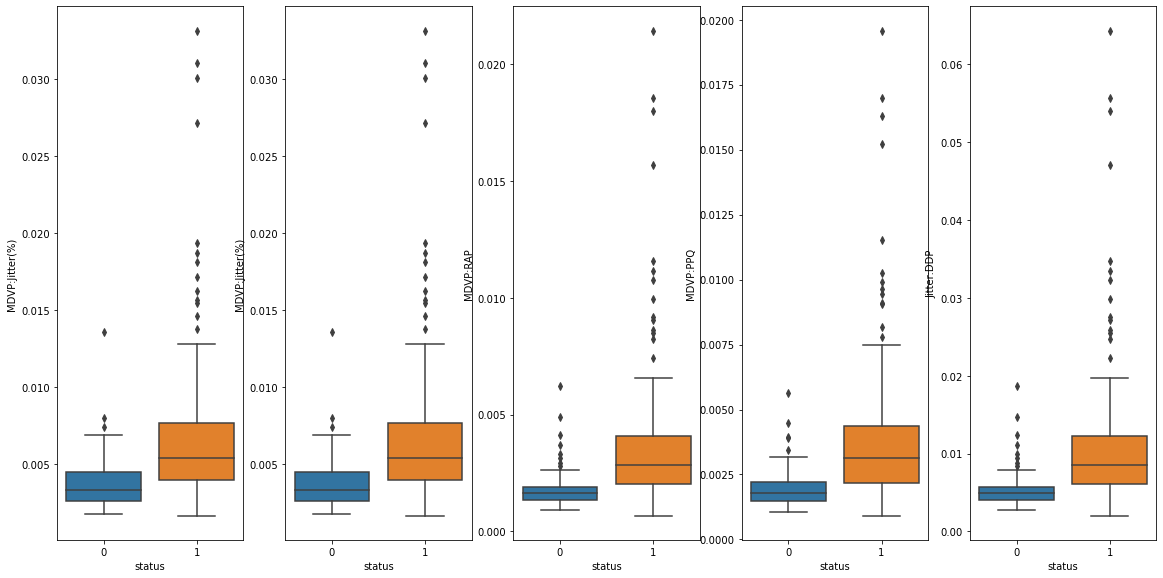

In [20]:
# For categorical predictors
cols = ["MDVP:Jitter(%)","MDVP:Jitter(%)","MDVP:RAP","MDVP:PPQ","Jitter:DDP"]
fig, axs = plt.subplots(ncols = 5,figsize=(16,8))
fig.tight_layout()
for i in range(0,len(cols)):
    sns.boxplot(x='status',y=cols[i],data=data, ax = axs[i])

BI-VARIATE ANALYSIS

/Users/neerajreddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/neerajreddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='spread1', ylabel='Density'>

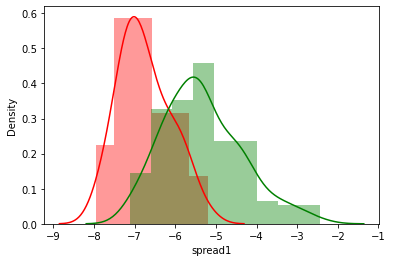

In [24]:
sns.distplot( data[data.status == 0]['spread1'], color = 'r')
sns.distplot( data[data.status == 1]['spread1'], color = 'g')

Spread1 is normally distributed between person who have PD and who is normal. People who have spread1 between - 8.5 and -7.5 are more and they are normal. People whose spread1 is between -6.5 and -5 are having PD

<AxesSubplot:xlabel='status', ylabel='HNR'>

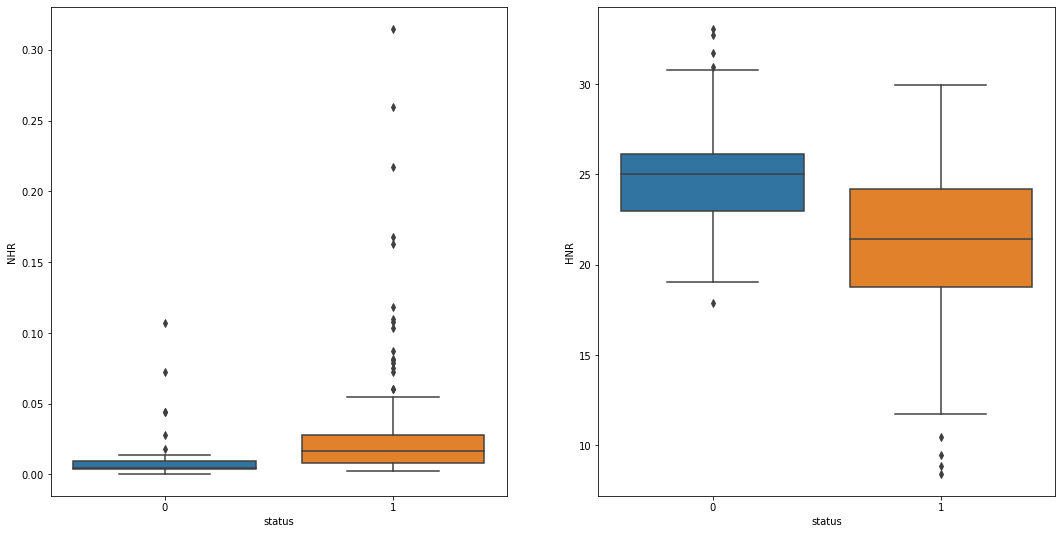

In [25]:
fig, ax = plt.subplots(1,2,figsize=(18,9))
sns.boxplot(x='status',y='NHR',data=data,ax=ax[0])
sns.boxplot(x='status',y='HNR',data=data,ax=ax[1])

People who have PD(status equal to one) have higher levels of outliers. Also, looking into the HNR ratio people who have PD have lower levels in the same.



<AxesSubplot:xlabel='status', ylabel='MDVP:Fo(Hz)'>

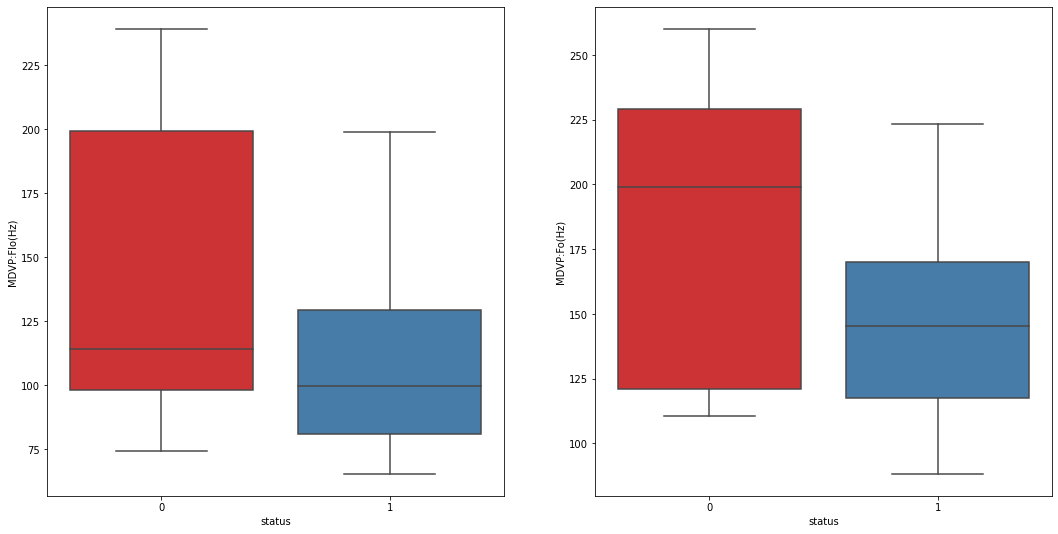

In [26]:
fig, ax = plt.subplots(1,2,figsize=(18,9))
sns.boxplot(x='status',y='MDVP:Flo(Hz)',data=data,palette="Set1",ax=ax[0])
sns.boxplot(x='status',y='MDVP:Fo(Hz)',data=data,palette="Set1",ax=ax[1])


When we look the relationship between status and MDVP:Fo(Hz) we can see the median value is around 199 Hz for people who are normal. For people who are affected with Parkinsons the median value comes around 145 Hz

CORELATION COMPARISION WITH HEAT MAP

we can use heat map to find the correlations coefficient values. we will remove the less correlation coefficient columns. We can remove the irrelavant features it will minimize the accuracy of an algorithm.

<AxesSubplot:>

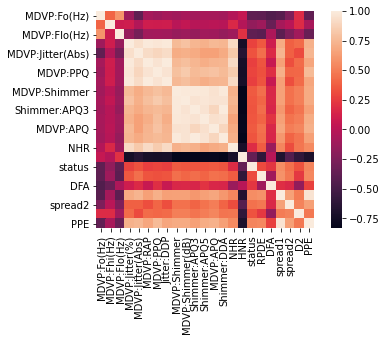

In [32]:
corr_map=data.corr()
sns.heatmap(corr_map,square=True)

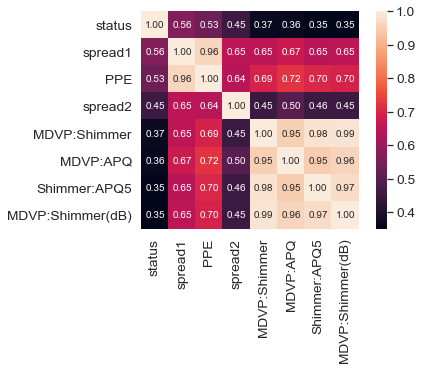

In [35]:
# Now visualise the heat map with correlation coefficient values for pair of attributes.

# K value means how many features required to see in heat map
k=8

cols=corr_map.nlargest(k,'status')['status'].index

# correlation coefficient values
coff_values=np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(coff_values,cbar=True,annot=True,square=True,fmt='.2f',
           annot_kws={'size': 10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()


In the above heatmap we got corelation between top 8 coficient values
Now we need to print all the coefficient values in each attribute,later we can decide which attribute have relavant and irrelavant features.

In [40]:
correlation_values=data.corr()['status']
correlation_values.abs().sort_values(ascending=True)

MDVP:Fhi(Hz)        0.166136
NHR                 0.189429
DFA                 0.231739
Jitter:DDP          0.266646
MDVP:RAP            0.266668
MDVP:Jitter(%)      0.278220
MDVP:PPQ            0.288698
RPDE                0.308567
MDVP:Jitter(Abs)    0.338653
D2                  0.340232
Shimmer:DDA         0.347608
Shimmer:APQ3        0.347617
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ5        0.351148
HNR                 0.361515
MDVP:APQ            0.364316
MDVP:Shimmer        0.367430
MDVP:Flo(Hz)        0.380200
MDVP:Fo(Hz)         0.383535
spread2             0.454842
PPE                 0.531039
spread1             0.564838
status              1.000000
Name: status, dtype: float64

The above corelation values are in ascending order,we have the corelation between each atributes,we are going to drop first five from MDVP:Fhi(Hz) to MDVP:RAP
>> when we remove irrelavent features the accuracy increases automatically

In [41]:
## dropping irelavent features
y=data['status']
cols=['MDVP:RAP','Jitter:DDP','DFA','NHR','MDVP:Fhi(Hz)','name','status']
x=data.drop(cols,axis=1)

CLASSIFICATION MODELS WITHOUT FEATURE SCALING

Splitting the data set into training and testing set

In [45]:
train_size=0.70
test_size=0.30
seed=5

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=train_size,test_size=test_size,random_state=seed)
print(len(x_train)),print(len(x_test))

136
59


(None, None)

APPLYING DECISION TREE

In [46]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=100,min_samples_leaf=5)

In [48]:
dt_model.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=100)

In [109]:
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

DecisionTreeClassifier(criterion='entropy', max_depth=6,
                       min_impurity_split=1e-07, min_samples_leaf=5,
                       presort=False, random_state=100)

In [115]:
accuracy_dt = dt_model.score(x_test , y_test) 
print(accuracy_dt)


0.9152542372881356


In [52]:
y_pred = dt_model.predict(x_test)

In [169]:
#from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
#dt_model_conf_matrix = ConfusionMatrix( DecisionTreeClassifier )
#dt_model__matrix.fit( X_train, y_train )
#dt_model_conf_matrix.score( X_test, y_test )
#dt_model_conf_matrix.poof()


array([[10,  6],
       [ 0, 43]])

In [129]:
train_char_label = ['No', 'Yes']
pd_tree_regularized = open('pd_tree_regularized.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file= pd_tree_regularized , feature_names = list(x_train), class_names = list(train_char_label))

pd_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = x_train.columns))

                       Imp
MDVP:Fo(Hz)       0.190093
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:PPQ          0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.064478
Shimmer:APQ5      0.000000
MDVP:APQ          0.123021
Shimmer:DDA       0.000000
HNR               0.122650
RPDE              0.000000
spread1           0.000000
spread2           0.000000
D2                0.000000
PPE               0.499759


In [140]:
!pip install graphviz
system("dot -Tpng pd_tree_regularized.dot -o pd_tree_regularized.png")
Image("pd_tree_regularized.png")
#from PIL import Image                                                                                
#img = Image.open('pd_tree_regularized.png')
#img.show() 
#system.view()

TypeError: 'module' object is not callable

MIS-CLASSIFIED SAMPLES IN DECISION TREE

In [66]:
count_misclassified = (y_test != y_pred).sum()
print('SAMPLES MIS-CLASSIFIED IN DT ARE: {}'.format(count_misclassified))

SAMPLES MIS-CLASSIFIED IN DT ARE: 7


APPLYING KNN


In [61]:

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
knn_model.score(x_test,y_test)



0.8813559322033898

In [62]:
y_pred = k_model.predict(x_test)

In [64]:
confusion_matrix(y_test,y_pred)

array([[10,  6],
       [ 1, 42]])

MIS-CLASSIFIED SAMPLES IN KNN

In [67]:
count_misclassified = (y_test != y_pred).sum()
print('SAMPLES MIS-CLASSIFIED IN kNN ARE: {}'.format(count_misclassified))

SAMPLES MIS-CLASSIFIED IN kNN ARE: 7


RANDOM FOREST CLASSIFIER

In [101]:
rfc = RandomForestClassifier(n_estimators = 50)
rfc = rfcl.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
rfc.score(x_test , y_test)

0.8813559322033898

In [103]:
confusion_matrix(y_test,y_pred)

array([[10,  6],
       [ 1, 42]])

MIS-CLASSIFIED SAMPLES IN RFCL

In [102]:
count_misclassified = (y_test != y_pred).sum()
print('SAMPLES MIS-CLASSIFIED IN RFCL ARE: {}'.format(count_misclassified))

SAMPLES MIS-CLASSIFIED IN RFCL ARE: 7


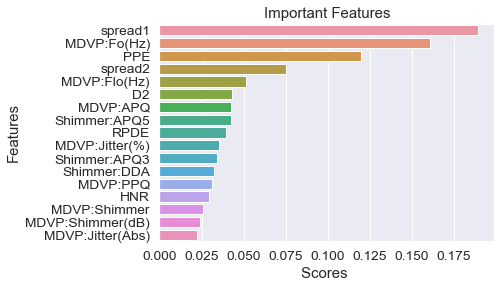

In [119]:
feature_imp = pd.Series(rfc.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Scores ')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()

LOGISTIC REGRESSION

In [94]:
lrc = LogisticRegression()
lrc.fit(x_train, y_train)

Y_pred = lr.predict(x_test)
lrc.score(x_test , y_test)



/Users/neerajreddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8135593220338984

MIS-CLASSIFIED SAMPLES IN LR

In [95]:
count_misclassified = (y_test != y_pred).sum()
print('SAMPLES MIS-CLASSIFIED IN Lrc ARE: {}'.format(count_misclassified))

SAMPLES MIS-CLASSIFIED IN Lrc ARE: 7


In [ ]:
ACCURACIES

LOGISTIC REGRESSION      : 0.81
RANDOM FOREST CLASSIFIER : 0.88
K NEAREST NEIGHBOUR      : 0.88
DECISION TREE            : 0.91
    


CLASSIFICATION MODELS WITH SCALING

In [128]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [146]:
#Scaling

x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

# numerical features
num_cols =  ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']
      

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(x_train_scaled[[i]])
    
    # transform the training data column
    x_train_scaled[i] = scale.transform(x_train_scaled[[i]])
    
    # transform the testing data column
    x_test_scaled[i] = scale.transform(x_test_scaled[[i]])

KeyError: "None of [Index(['MDVP:Fhi(Hz)'], dtype='object')] are in the [columns]"

APPLYING BOOSTING

In [149]:
from sklearn.ensemble import BaggingClassifier
boosting = BaggingClassifier(base_estimator=dt_model, n_estimators=50, max_samples=.7)
boosting = bgcl.fit(x_train, y_train)
y_pred = bgcl.predict(x_test)
boosting.score(x_test , y_test)

0.8305084745762712

In [150]:
misclassified_count = (y_test != y_pred).sum()
print('Misclassified samples in Bagging: {}'.format(misclassified_count))

Misclassified samples in Bagging: 10


APPLYING ADA BOOSTING

In [159]:
from sklearn.ensemble import AdaBoostClassifier
aboosting = AdaBoostClassifier( n_estimators= 50)
aboosting = abcl.fit(x_train,y_train)
y_pred = abcl.predict(x_test)
aboosting.score(x_test , y_test)

0.8813559322033898

In [155]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in Ada Boosting: {}'.format(count_misclassified))

Misclassified samples in Ada Boosting: 7


APPLYING GRADIENT BOOSTING

In [160]:
from sklearn.ensemble import GradientBoostingClassifier
gboosting = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gboosting = gboosting.fit(x_train,y_train)
y_pred = gboosting.predict(x_test)
gboosting.score(x_test , y_test)


0.8983050847457628

In [161]:
misclassified_count = (y_test != y_pred).sum()
print('Misclassified samples in Gradient Boosting: {}'.format(misclassified_count))

Misclassified samples in Gradient Boosting: 6
